# Module 5 Homework - Cleaning Up the MoMA Artwork 

In this lab, you will put your Pandas data cleaning skills to the test by cleaning up the MoMA artwork csv file.  Solve each of the following problems using the functions from `dfply`.  

For each problem, perform two steps.

1. Explore the specified column using the techniques from the last lecture.
2. Fix all issues found in part 1.

**Note that I will be looking for a literate, easy to follow, set of code and markdown cells.**  Part of your score will be determined by the cleanliness/conciseness of your presentation.

Where possible, solve each problem with one pipe.

In [1]:
import pandas as pd
from dfply import *
artwork = pd.read_csv("./data/Artworks.csv")

## Problem 1
    
**Task:** Explore the values of `artist.EndDate` and fix any issues.


In [2]:
artist = pd.read_csv("./data/Artists.csv")

Looking at the data

In [3]:
artist.EndDate.value_counts()

0       10190
1991       86
1999       85
1993       80
2004       79
        ...  
1795        1
1226        1
1897        1
1889        1
1899        1
Name: EndDate, Length: 169, dtype: int64

In [4]:
artist.dtypes

ConstituentID      int64
DisplayName       object
ArtistBio         object
Nationality       object
Gender            object
BeginDate          int64
EndDate            int64
Wiki QID          object
ULAN             float64
dtype: object

Changing the enddate to null as they did not die at year 0

In [5]:
new_artist=(artist
 >> mutate(EndDate = X.EndDate.replace({0:np.NaN}))
)
new_artist

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992.0,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,NaN,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,NaN,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,NaN,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15217,133006,Andrew Chesnutt,"American, 1861–1934",American,Male,1861,1934.0,NaN,NaN
15218,133007,Lewis Chesnutt,"American, 1860–1933",American,Male,1860,1933.0,NaN,NaN
15219,133026,Alfred Tritschler,"German, 1905 – 1970",German,NaN,1905,1970.0,NaN,NaN
15220,133027,Studio of Dr. Paul Wolff & Tritschler,NaN,NaN,NaN,0,NaN,NaN,NaN


Double checking there's no 0's

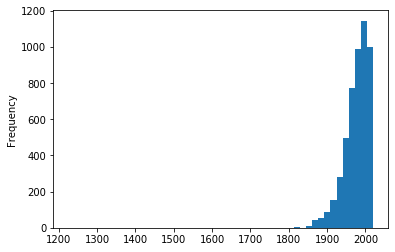

In [6]:
import matplotlib.pylab as plt
%matplotlib inline
new_artist.EndDate.plot(kind='hist', bins = 50)

## Problem 2
    
**Task:** Fix the issues with `artwork.Gender`

Looking through gender data

In [7]:
artwork.Gender

0                   (Male)
1                   (Male)
2                   (Male)
3                   (Male)
4                   (Male)
                ...       
138146    () (Male) (Male)
138147            (Female)
138148            (Female)
138149            (Female)
138150            (Female)
Name: Gender, Length: 138151, dtype: object

In [8]:
artwork.Gender.value_counts()

(Male)                                              104140
(Female)                                             17821
()                                                    7358
(Male) (Male)                                         1759
(Male) (Male) (Male)                                   876
                                                     ...  
(Male) (Male) (Male) (Male) (Female) (Male)              1
() (Male) (Male) (Male) (Male) (Female)                  1
() (Female) (Female) (Male) (Male) (Male) (Male)         1
() (Male) () (Male) () (Male) (Male)                     1
(Male) () () () (Male) ()                                1
Name: Gender, Length: 409, dtype: int64

I think that giving 3 artists per artwork gives enough context to diffienciate the pieces(over 99% have 3 or fewer), most only have a single artist anyways. I do not want to have 40 extra columns just for a handful of pieces to use.

In [9]:
artwork_gender_fixed=(artwork
 >> mutate(Gender = X.Gender.replace({'()':np.NaN}))
 >> mutate(Gender = X.Gender.str.replace('\(\)', 'NaN'))
 >> mutate(Gender = X.Gender.str.replace('[()]', ''))
 >> mutate(Gender1 = X.Gender.str.split(" ").str[0])
 >> mutate(Gender2 = X.Gender.str.split(' ').str[1])
 >> mutate(Gender3 = X.Gender.str.split(' ').str[2])
 >> drop(X.Gender)
)

In [10]:
artwork_gender_fixed

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Date,Medium,Dimensions,...,Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),Gender1,Gender2,Gender3
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",...,NaN,48.600000,NaN,NaN,168.900000,NaN,NaN,Male,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",...,NaN,40.640100,NaN,NaN,29.845100,NaN,NaN,Male,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",...,NaN,34.300000,NaN,NaN,31.800000,NaN,NaN,Male,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",...,NaN,50.800000,NaN,NaN,50.800000,NaN,NaN,Male,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",...,NaN,38.400000,NaN,NaN,19.100000,NaN,NaN,Male,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...","133005, 133006, 133007","(American, 1861–1934) (American, 1860–1933)",() (American) (American),(0) (1861) (1860),(0) (1934) (1933),c. 1890,Gelatin silver print,"4 1/4 × 6 1/2"" (10.8 × 16.5 cm)",...,NaN,10.795022,NaN,NaN,16.510033,NaN,NaN,NaN,Male,Male
138147,Plate (folio 2 verso) from Muscheln und schirm...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",...,NaN,13.500000,NaN,NaN,10.000000,NaN,NaN,Female,NaN,NaN
138148,Plate (folio 6) from Muscheln und schirme (She...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",...,NaN,13.500000,NaN,NaN,10.000000,NaN,NaN,Female,NaN,NaN
138149,Plate (folio 12) from Muscheln und schirme (Sh...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),1939,One from an illustrated book with four line bl...,"composition: 4 5/16 × 3 15/16"" (11 × 10 cm); p...",...,NaN,11.000000,NaN,NaN,10.000000,NaN,NaN,Female,NaN,NaN


## Problem 3
    
**Task:** Fix the issues with `artwork.BeginDate` and `artwork.EndDate`.  Note that you will want to convert to `.astype('int64')` at the end of the expression.

Looking through dates data

In [11]:
artwork.EndDate

0                    (1918)
1                       (0)
2                    (1957)
3                       (0)
4                    (1957)
                ...        
138146    (0) (1934) (1933)
138147               (1943)
138148               (1943)
138149               (1943)
138150               (1943)
Name: EndDate, Length: 138151, dtype: object

In [12]:
artwork.dtypes

Title                  object
Artist                 object
ConstituentID          object
ArtistBio              object
Nationality            object
BeginDate              object
EndDate                object
Gender                 object
Date                   object
Medium                 object
Dimensions             object
CreditLine             object
AccessionNumber        object
Classification         object
Department             object
DateAcquired           object
Cataloged              object
ObjectID                int64
URL                    object
ThumbnailURL           object
Circumference (cm)    float64
Depth (cm)            float64
Diameter (cm)         float64
Height (cm)           float64
Length (cm)           float64
Weight (kg)           float64
Width (cm)            float64
Seat Height (cm)      float64
Duration (sec.)       float64
dtype: object

In [13]:
artwork.EndDate.value_counts()

(0)                                     46071
(1927)                                   5137
(2010)                                   4085
(1985)                                   3402
(1969)                                   3391
                                        ...  
(1936) (1901) (0)                           1
(0) (2006) (2006) (0) (0)                   1
(1997) (0) (2018) (0) (0) (2013) (0)        1
(0) (0) (0) (2004) (0) (0) (0)              1
(0) (2017) (0)                              1
Name: EndDate, Length: 1286, dtype: int64

Keeping with the gender, 3 columns per row for enddate and begindate

In [14]:
artwork_dates_fixed=(artwork_gender_fixed
 >> mutate(EndDate = X.EndDate.replace({'(0)':np.NaN}))
 >> mutate(EndDate = X.EndDate.str.replace('[()]', ''))
 >> mutate(EndDate1 = X.EndDate.str.split(" ").str[0].replace({'0':np.NaN}).astype('Int64'))
 >> mutate(EndDate2 = X.EndDate.str.split(' ').str[1].replace({'0':np.NaN}).astype('Int64'))
 >> mutate(EndDate3 = X.EndDate.str.split(' ').str[2].replace({'0':np.NaN}).astype('Int64'))
 >> drop(X.EndDate)

 >> mutate(BeginDate = X.BeginDate.replace({'(0)':np.NaN}))
 >> mutate(BeginDate = X.BeginDate.str.replace('[()]', ''))
 >> mutate(BeginDate1 = X.BeginDate.str.split(" ").str[0].replace({'0':np.NaN}).astype('Int64'))
 >> mutate(BeginDate2 = X.BeginDate.str.split(' ').str[1].replace({'0':np.NaN}).astype('Int64'))
 >> mutate(BeginDate3 = X.BeginDate.str.split(' ').str[2].replace({'0':np.NaN}).astype('Int64'))
 >> drop(X.BeginDate)
)

In [15]:
artwork_dates_fixed

,Title,Artist,ConstituentID,ArtistBio,Nationality,Date,Medium,Dimensions,CreditLine,AccessionNumber,...,Duration (sec.),Gender1,Gender2,Gender3,EndDate1,EndDate2,EndDate3,BeginDate1,BeginDate2,BeginDate3
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,...,NaN,Male,NaN,NaN,1918,<NA>,<NA>,1841,<NA>,<NA>
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,1.1995,...,NaN,Male,NaN,NaN,<NA>,<NA>,<NA>,1944,<NA>,<NA>
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,1.1997,...,NaN,Male,NaN,NaN,1957,<NA>,<NA>,1876,<NA>,<NA>
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",Purchase and partial gift of the architect in ...,2.1995,...,NaN,Male,NaN,NaN,<NA>,<NA>,<NA>,1944,<NA>,<NA>
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Gift of Jo Carole and Ronald S. Lauder,2.1997,...,NaN,Male,NaN,NaN,1957,<NA>,<NA>,1876,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...","133005, 133006, 133007","(American, 1861–1934) (American, 1860–1933)",() (American) (American),c. 1890,Gelatin silver print,"4 1/4 × 6 1/2"" (10.8 × 16.5 cm)",Gift of John Jeremiah Sullivan,TR16527.25,...,NaN,NaN,Male,Male,<NA>,1934,1933,<NA>,1861,1860
138147,Plate (folio 2 verso) from Muscheln und schirm...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",The Abby Aldrich Rockefeller Endowment for Prints,762.2019.1,...,NaN,Female,NaN,NaN,1943,<NA>,<NA>,1889,<NA>,<NA>
138148,Plate (folio 6) from Muscheln und schirme (She...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",The Abby Aldrich Rockefeller Endowment for Prints,762.2019.2,...,NaN,Female,NaN,NaN,1943,<NA>,<NA>,1889,<NA>,<NA>
138149,Plate (folio 12) from Muscheln und schirme (Sh...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),1939,One from an illustrated book with four line bl...,"composition: 4 5/16 × 3 15/16"" (11 × 10 cm); p...",The Abby Aldrich Rockefeller Endowment for Prints,762.2019.3,...,NaN,Female,NaN,NaN,1943,<NA>,<NA>,1889,<NA>,<NA>


## Problem 4
    
**Task:** Use `value_counts` to identify some issues with `artwork.Artist` and `artwork.Nationality`.  Discuss some strategies to solve these issues.  Do your best to clean these columns up.

Looking through data for artist

In [16]:
[tup for tup in zip(artwork.Total_artists.value_counts().index, artwork.Artist.value_counts())]

AttributeError: 'DataFrame' object has no attribute 'Total_artists'

Problems: commas when multiple people, sometimes says various artists when multiple but not always. unknown sometimes Unknown Artist

So now also giving first 3 artists, but also with counts of total so we still know if there are more. You'd have to specifically look up those cases

In [57]:
(artwork_dates_fixed
 >> mutate(Artist = X.Artist.str.replace(',', ';').str.replace('unknown', 'Unknown Artist').str.replace('; USA', ' USA').str.replace('; CA', ' CA').str.replace('; LLC',' LLC').str.replace('; CT', ' CT').str.replace('; Mexico', ' Mexico').str.replace('; Detroit; MI', ' Detroit MI').str.replace('[\[\]]', '\(\)').str.replace('; Ltd', ' Ltd').str.replace('; Inc', ' Inc').str.replace('; Tokyo', ' Tokyo').str.replace('; KY', ' KY').str.replace('; Germany; and Hambach; France', ' Germany and Hambach France').str.replace('; New York', ' New York').str.replace('; NY', ' NY').str.replace('; Southbridge; MA', ' Southbridge MA').str.replace('; Japan', ' Japan').str.replace('; Sweden', ' Sweden').str.replace('; PA', ' PA').str.replace('; Paris', ' Paris').str.replace('; Los Angeles', ' Los Angeles').str.replace('; London', ' London').str.replace('; Jr', ' Jr').str.replace('; Croatia', ' Croatia').str.replace('; Vs', ' Vs').str.replace('; France', ' France').str.replace('; Manchester', ' Manchester').str.replace('; England', ' England').str.replace('; Solingen', ' Solingen').str.replace('; Germany', ' Germany').str.replace('; Italy', ' Italy').str.replace('; Murano', ' Murano').str.replace('; Milan', ' Milan').str.replace('; Henderson', ' Henderson').str.replace('; Auburn', ' Auburn').str.replace('; Toledo', '; Toledo').str.replace('; OH', ' OH').str.replace('; Santa Monica CA',' Santa Monica CA').str.replace('; Berlin',' Berlin').str.replace('; Architects',' Architects').str.replace('; Corning NY',' Corning NY').str.replace('; Copenhagen',' Copenhagen').str.replace('; Asheville',' Asheville').str.replace('; NC',' NC').str.replace('; Chattanooga',' Chattanooga').str.replace('; TN',' TN').str.replace('; Rauch and Scott Brown',' Rauch and Scott Brown').str.replace('; Basel',' Basel').str.replace('; company design',' company design').str.replace('; Stockton CA',' Stockton CA').str.replace('; Milton',' Milton').str.replace('; WV',' WV').str.replace('; Utility Box Div',' Utility Box Div').str.replace('; St. Paul', ' St. Paul').str.replace('; MN',' MN').str.replace('; Golden',' Golden').str.replace('; CO',' CO').str.replace('; Bellaire OH',' Bellaire OH').str.replace('; New Kensington',' New Kensington').str.replace('; Fukui',' Fukui').str.replace('; Czechoslovakia',' Czechoslovakia').str.replace('; Neuwield',' Neuwield').str.replace('; Nancy France',' Nancy France').str.replace('; Gistel',' Gistel').str.replace('; Belgium',' Belgium').str.replace('; Woodhaven',' Woodhaven').str.replace('; Limoges',' Limoges').str.replace('; St. Louis',' St. Louis').str.replace('; MO',' MO').str.replace('; Collinsville',' Collinsville').str.replace('; Boston',' Boston').str.replace('; MA',' MA').str.replace('; Long Island',' Long Island').str.replace('; Chicago',' Chicago').str.replace('; IL',' IL').str.replace('; New Martinsville',' New Martinsville').str.replace('; WV',' WV').str.replace('; Louisville',' Louisville').str.replace('; Stamford CT',' Stamford CT').str.replace('; Worcester',' Worcester').str.replace('; MA',' MA').str.replace('; Pittsburgh',' Pittsburgh').str.replace('; Pennsylvania',' Pennsylvania').str.replace('; Warehouse Point CT',' Warehouse Point CT').str.replace('; Bridgeport',' Bridgeport').str.replace('; Santa Clara',' Santa Clara').str.replace('; Providence',' Providence').str.replace('; RI',' RI').str.replace('; Wisconsin',' Wisconsin').str.replace('; Meriden',' Meriden').str.replace('; Birmingham',' Birmingham').str.replace('Designer; Chinese','Designer Chinese').str.replace('; Springfield',' Springfield').str.replace('; Eskilstuna',' Eskilstuna').str.replace('; Plumbers Brass Goods Div.; Waterbury CT',' Plumbers Brass Goods Div. Waterbury CT').str.replace('; Antrim',' Antrim').str.replace('; NH',' NH').str.replace('; Hartford',' Hartford').str.replace('; Athol',' Athol').str.replace('; Seattle',' Seattle').str.replace('; WA',' WA').str.replace('; Trenton',' Trenton').str.replace('; NJ',' NJ').str.replace('; Empoli',' Empoli').str.replace('; Sheboygan',' Sheboygan').str.replace('; WI',' WI').str.replace('; Switzerland',' Switzerland').str.replace('; Panelyte Div',' Panelyte Div').str.replace('; California',' California').str.replace('; Watertown',' Watertown').str.replace('; Toledo',' Toledo').str.replace('Gurioli Francesco','Gurioli, Francesco').str.replace('; Lenzburg',' Lenzburg').str.replace('; Switzerland',' Switzerland').str.replace('; Brooklyn',' Brooklyn').str.replace('; Wärtsilä Ab; Helsinki',' Wärtsilä Ab Helsinki').str.replace('; Finland',' Finland').str.replace('; Omegna',' Omegna').str.replace('; Amstelveen',' Amstelveen').str.replace('; The Netherlands',' The Netherlands').str.replace('; Bradford',' Bradford').str.replace('; San Francisco',' San Francisco').str.replace('; Winsted',' Winsted').str.replace('; Farmington',' Farmington').str.replace('; Maranello',' Maranello').str.replace('; Sunnydale',' Sunnydale').str.replace('; Dallas',' Dallas').str.replace('; TX',' TX').str.replace('; Munich',' Munich').str.replace('; Gumma',' Gumma').str.replace('; Owens-Illinois Co.',' Owens-Illinois Co.').str.replace('; Toledo',' Toledo').str.replace('; Shellberg Falls',' Shellberg Falls').str.replace('; Lynbrook',' Lynbrook').str.replace('; Ulm',' Ulm').str.replace('; Vienna',' Vienna').str.replace('; Erie PA',' Erie PA').str.replace('; Murray Hill',' Murray Hill').str.replace('; Santa Clara',' Santa Clara').str.replace('; East Fishkill',' East Fishkill').str.replace('; Milpitas',' Milpitas').str.replace('; San Jose',' San Jose').str.replace('; Palo Alto',' Palo Alto').str.replace('; Cincinatti',' Cincinatti').str.replace('; Waterbury',' Waterbury').str.replace('; St. Petersburg',' St. Petersburg').str.replace('; FL',' FL').str.replace('; Scottish 1866-1941 & William Nicholson; British',' Scottish 1866-1941 & William Nicholson British'))
 >> mutate(Artist1 = X["Artist"].str.split(";").str[0])
 >> mutate(Artist2 = X.Artist.str.split(';').str[1])
 >> mutate(Artist3 = X.Artist.str.split(';').str[2])
 >> mutate(Total_artists = X.Artist.str.split(';').str.len().astype('Int64'))
 >> drop(X.Artist)
 >> select(X.Artist1, X.Artist2, X.Artist3)
)


,Artist1,Artist2,Artist3
0,Otto Wagner,NaN,NaN
1,Christian de Portzamparc,NaN,NaN
2,Emil Hoppe,NaN,NaN
3,Bernard Tschumi,NaN,NaN
4,Emil Hoppe,NaN,NaN
...,...,...,...
138146,Chesnutt Brothers Studio,Andrew Chesnutt,Lewis Chesnutt
138147,Sophie Taeuber-Arp,NaN,NaN
138148,Sophie Taeuber-Arp,NaN,NaN
138149,Sophie Taeuber-Arp,NaN,NaN


Looking at Nationalities

In [40]:
from collections import Counter
pd.options.display.max_rows = 138150
[*Counter([tup for tup in zip(test.Artist, artwork.Gender)])]

[('Otto Wagner', '(Male)'),
 ('Christian de Portzamparc', '(Male)'),
 ('Emil Hoppe', '(Male)'),
 ('Bernard Tschumi', '(Male)'),
 ('Louis I. Kahn', '(Male)'),
 ('Marcel Kammerer', '(Male)'),
 ('Otto Schönthal', '(Male)'),
 ('Hans Poelzig', '(Male)'),
 ('Raimund Abraham', '(Male)'),
 ('Peter Eisenman; Robert Cole', '(Male) (Male)'),
 ('Rem Koolhaas; Madelon Vriesendorp', '(Male) (Female)'),
 ('Roger C. Ferri', '(Male)'),
 ('Michael Graves', '(Male)'),
 ('Aldo Rossi; Gianni Braghieri; M. Bosshard', '(Male) (Male) (Male)'),
 ('Ludwig Mies van der Rohe', '(Male)'),
 ('Erik Gunnar Asplund', '(Male)'),
 ('Erik Gunnar Asplund; Sigurd Lewerentz', '(Male) (Male)'),
 ('Paul Nelson; Frantz Jourdain; Oscar Nitzchke', '(Male) (Male) (Male)'),
 ('Paul Nelson; Oscar Nitzchke; Frantz Jourdain', '(Male) (Male) (Male)'),
 ('Steven Holl', '(Male)'),
 ('Erich Mendelsohn', '(Male)'),
 ('Paolo Soleri', '(Male)'),
 ('Paul Rudolph', '(Male)'),
 ('Peter Cook', '(Male)'),
 ('Diller + Scofidio; Elizabeth Diller; 

In [162]:
[tup for tup in zip(artwork.Nationality.value_counts().index, artwork.Nationality.value_counts())]

[('(American)', 56963),
 ('(French)', 22589),
 ('(German)', 9239),
 ('(British)', 5576),
 ('()', 5025),
 ('(Spanish)', 3124),
 ('(Italian)', 2774),
 ('(Japanese)', 2423),
 ('(Russian)', 2190),
 ('(Swiss)', 2105),
 ('(American) (American)', 1657),
 ('(Dutch)', 1581),
 ('(Belgian)', 1455),
 ('(Mexican)', 1319),
 ('(Nationality unknown)', 1158),
 ('(Austrian)', 884),
 ('(Argentine)', 817),
 ('(Brazilian)', 806),
 ('(Canadian)', 799),
 ('(Czech)', 765),
 ('(Colombian)', 743),
 ('(Chilean)', 580),
 ('(Polish)', 539),
 ('(Venezuelan)', 493),
 ('(Ivorian)', 482),
 ('(Danish)', 473),
 ('(South African)', 412),
 ('(American) (French) (Hungarian)', 365),
 ('(Israeli)', 341),
 ('(American) ()', 271),
 ('(Swedish)', 255),
 ('(Australian)', 251),
 ('(Chinese)', 241),
 ('(British) (British)', 225),
 ('(Finnish)', 220),
 ('(American) (American) (American)', 216),
 ('(Indian)', 211),
 ('(Cuban)', 201),
 ('(German) (German)', 188),
 ('(Norwegian)', 178),
 ('(Russian) (Russian)', 164),
 ('(Hungarian)', 

Problems: () for empty, (), multiple if there are many artists

Same for artists, I took the first three nationalities. (to match the first three artists)

In [310]:
(artwork_dates_fixed
 >> mutate(Nationality = X.Nationality.str.replace('\(\)', 'NaN').str.replace('[()]', ''))
 >> mutate(Nationality1 = X.Nationality.str.split(" ").str[0])
 >> mutate(Nationality2 = X.Nationality.str.split(' ').str[1])
 >> mutate(Nationality3 = X.Nationality.str.split(' ').str[2])
 >> drop(X.Nationality)
 >> head(20)
)

,Title,Artist,ConstituentID,ArtistBio,Gender,Date,Medium,Dimensions,CreditLine,AccessionNumber,...,Duration (sec.),EndDate1,EndDate2,EndDate3,BeginDate1,BeginDate2,BeginDate3,Nationality1,Nationality2,Nationality3
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Male),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,...,NaN,1918,<NA>,<NA>,1841,<NA>,<NA>,Austrian,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(Male),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,1.1995,...,NaN,<NA>,<NA>,<NA>,1944,<NA>,<NA>,French,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,1.1997,...,NaN,1957,<NA>,<NA>,1876,<NA>,<NA>,Austrian,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(Male),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",Purchase and partial gift of the architect in ...,2.1995,...,NaN,<NA>,<NA>,<NA>,1944,<NA>,<NA>,NaN,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Male),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Gift of Jo Carole and Ronald S. Lauder,2.1997,...,NaN,1957,<NA>,<NA>,1876,<NA>,<NA>,Austrian,NaN,NaN
5,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(Male),1976-77,Gelatin silver photograph,"14 x 18"" (35.6 x 45.7 cm)",Purchase and partial gift of the architect in ...,3.1995.1,...,NaN,<NA>,<NA>,<NA>,1944,<NA>,<NA>,NaN,NaN,NaN
6,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(Male),1976-77,Gelatin silver photographs,"Each: 14 x 18"" (35.6 x 45.7 cm)",Purchase and partial gift of the architect in ...,3.1995.1-24,...,NaN,<NA>,<NA>,<NA>,1944,<NA>,<NA>,NaN,NaN,NaN
7,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(Male),1976-77,Gelatin silver photograph,"14 x 18"" (35.6 x 45.7 cm)",Purchase and partial gift of the architect in ...,3.1995.10,...,NaN,<NA>,<NA>,<NA>,1944,<NA>,<NA>,NaN,NaN,NaN
8,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(Male),1976-77,Gelatin silver photograph,"14 x 18"" (35.6 x 45.7 cm)",Purchase and partial gift of the architect in ...,3.1995.11,...,NaN,<NA>,<NA>,<NA>,1944,<NA>,<NA>,NaN,NaN,NaN
9,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(Male),1976-77,Gelatin silver photograph,"14 x 18"" (35.6 x 45.7 cm)",Purchase and partial gift of the architect in ...,3.1995.12,...,NaN,<NA>,<NA>,<NA>,1944,<NA>,<NA>,NaN,NaN,NaN


Combined

In [58]:
(artwork_dates_fixed
 >> mutate(Artist = X.Artist.str.replace(',', ';').str.replace('unknown', 'Unknown Artist').str.replace('; USA', ' USA').str.replace('; CA', ' CA').str.replace('; LLC',' LLC').str.replace('; CT', ' CT').str.replace('; Mexico', ' Mexico').str.replace('; Detroit; MI', ' Detroit MI').str.replace('[\[\]]', '\(\)').str.replace('; Ltd', ' Ltd').str.replace('; Inc', ' Inc').str.replace('; Tokyo', ' Tokyo').str.replace('; KY', ' KY').str.replace('; Germany; and Hambach; France', ' Germany and Hambach France').str.replace('; New York', ' New York').str.replace('; NY', ' NY').str.replace('; Southbridge; MA', ' Southbridge MA').str.replace('; Japan', ' Japan').str.replace('; Sweden', ' Sweden').str.replace('; PA', ' PA').str.replace('; Paris', ' Paris').str.replace('; Los Angeles', ' Los Angeles').str.replace('; London', ' London').str.replace('; Jr', ' Jr').str.replace('; Croatia', ' Croatia').str.replace('; Vs', ' Vs').str.replace('; France', ' France').str.replace('; Manchester', ' Manchester').str.replace('; England', ' England').str.replace('; Solingen', ' Solingen').str.replace('; Germany', ' Germany').str.replace('; Italy', ' Italy').str.replace('; Murano', ' Murano').str.replace('; Milan', ' Milan').str.replace('; Henderson', ' Henderson').str.replace('; Auburn', ' Auburn').str.replace('; Toledo', '; Toledo').str.replace('; OH', ' OH').str.replace('; Santa Monica CA',' Santa Monica CA').str.replace('; Berlin',' Berlin').str.replace('; Architects',' Architects').str.replace('; Corning NY',' Corning NY').str.replace('; Copenhagen',' Copenhagen').str.replace('; Asheville',' Asheville').str.replace('; NC',' NC').str.replace('; Chattanooga',' Chattanooga').str.replace('; TN',' TN').str.replace('; Rauch and Scott Brown',' Rauch and Scott Brown').str.replace('; Basel',' Basel').str.replace('; company design',' company design').str.replace('; Stockton CA',' Stockton CA').str.replace('; Milton',' Milton').str.replace('; WV',' WV').str.replace('; Utility Box Div',' Utility Box Div').str.replace('; St. Paul', ' St. Paul').str.replace('; MN',' MN').str.replace('; Golden',' Golden').str.replace('; CO',' CO').str.replace('; Bellaire OH',' Bellaire OH').str.replace('; New Kensington',' New Kensington').str.replace('; Fukui',' Fukui').str.replace('; Czechoslovakia',' Czechoslovakia').str.replace('; Neuwield',' Neuwield').str.replace('; Nancy France',' Nancy France').str.replace('; Gistel',' Gistel').str.replace('; Belgium',' Belgium').str.replace('; Woodhaven',' Woodhaven').str.replace('; Limoges',' Limoges').str.replace('; St. Louis',' St. Louis').str.replace('; MO',' MO').str.replace('; Collinsville',' Collinsville').str.replace('; Boston',' Boston').str.replace('; MA',' MA').str.replace('; Long Island',' Long Island').str.replace('; Chicago',' Chicago').str.replace('; IL',' IL').str.replace('; New Martinsville',' New Martinsville').str.replace('; WV',' WV').str.replace('; Louisville',' Louisville').str.replace('; Stamford CT',' Stamford CT').str.replace('; Worcester',' Worcester').str.replace('; MA',' MA').str.replace('; Pittsburgh',' Pittsburgh').str.replace('; Pennsylvania',' Pennsylvania').str.replace('; Warehouse Point CT',' Warehouse Point CT').str.replace('; Bridgeport',' Bridgeport').str.replace('; Santa Clara',' Santa Clara').str.replace('; Providence',' Providence').str.replace('; RI',' RI').str.replace('; Wisconsin',' Wisconsin').str.replace('; Meriden',' Meriden').str.replace('; Birmingham',' Birmingham').str.replace('Designer; Chinese','Designer Chinese').str.replace('; Springfield',' Springfield').str.replace('; Eskilstuna',' Eskilstuna').str.replace('; Plumbers Brass Goods Div.; Waterbury CT',' Plumbers Brass Goods Div. Waterbury CT').str.replace('; Antrim',' Antrim').str.replace('; NH',' NH').str.replace('; Hartford',' Hartford').str.replace('; Athol',' Athol').str.replace('; Seattle',' Seattle').str.replace('; WA',' WA').str.replace('; Trenton',' Trenton').str.replace('; NJ',' NJ').str.replace('; Empoli',' Empoli').str.replace('; Sheboygan',' Sheboygan').str.replace('; WI',' WI').str.replace('; Switzerland',' Switzerland').str.replace('; Panelyte Div',' Panelyte Div').str.replace('; California',' California').str.replace('; Watertown',' Watertown').str.replace('; Toledo',' Toledo').str.replace('Gurioli Francesco','Gurioli, Francesco').str.replace('; Lenzburg',' Lenzburg').str.replace('; Switzerland',' Switzerland').str.replace('; Brooklyn',' Brooklyn').str.replace('; Wärtsilä Ab; Helsinki',' Wärtsilä Ab Helsinki').str.replace('; Finland',' Finland').str.replace('; Omegna',' Omegna').str.replace('; Amstelveen',' Amstelveen').str.replace('; The Netherlands',' The Netherlands').str.replace('; Bradford',' Bradford').str.replace('; San Francisco',' San Francisco').str.replace('; Winsted',' Winsted').str.replace('; Farmington',' Farmington').str.replace('; Maranello',' Maranello').str.replace('; Sunnydale',' Sunnydale').str.replace('; Dallas',' Dallas').str.replace('; TX',' TX').str.replace('; Munich',' Munich').str.replace('; Gumma',' Gumma').str.replace('; Owens-Illinois Co.',' Owens-Illinois Co.').str.replace('; Toledo',' Toledo').str.replace('; Shellberg Falls',' Shellberg Falls').str.replace('; Lynbrook',' Lynbrook').str.replace('; Ulm',' Ulm').str.replace('; Vienna',' Vienna').str.replace('; Erie PA',' Erie PA').str.replace('; Murray Hill',' Murray Hill').str.replace('; Santa Clara',' Santa Clara').str.replace('; East Fishkill',' East Fishkill').str.replace('; Milpitas',' Milpitas').str.replace('; San Jose',' San Jose').str.replace('; Palo Alto',' Palo Alto').str.replace('; Cincinatti',' Cincinatti').str.replace('; Waterbury',' Waterbury').str.replace('; St. Petersburg',' St. Petersburg').str.replace('; FL',' FL').str.replace('; Scottish 1866-1941 & William Nicholson; British',' Scottish 1866-1941 & William Nicholson British'))
 >> mutate(Artist1 = X["Artist"].str.split(";").str[0])
 >> mutate(Artist2 = X.Artist.str.split(';').str[1])
 >> mutate(Artist3 = X.Artist.str.split(';').str[2])
 >> mutate(Total_artists = X.Artist.str.split(';').str.len().astype('Int64'))
 >> drop(X.Artist)
 
 >> mutate(Nationality = X.Nationality.str.replace('\(\)', '<NA>').str.replace('[()]', ''))
 >> mutate(Nationality1 = X.Nationality.str.split(" ").str[0])
 >> mutate(Nationality2 = X.Nationality.str.split(' ').str[1])
 >> mutate(Nationality3 = X.Nationality.str.split(' ').str[2])
 >> drop(X.Nationality)
)

,Title,ConstituentID,ArtistBio,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),Gender1,Gender2,Gender3,EndDate1,EndDate2,EndDate3,BeginDate1,BeginDate2,BeginDate3,Artist1,Artist2,Artist3,Total_artists,Nationality1,Nationality2,Nationality3
0,"Ferdinandsbrücke Project, Vienna, Austria (Elevation, preliminary version)",6210,"(Austrian, 1841–1918)",1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and Ronald S. Lauder,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0sWyJwIiwiY29udmVydCIsIi1yZXNpemUgMzAweDMwMFx1MDAzZSJdXQ.jpg?sha=137b8455b1ec6167,NaN,NaN,NaN,48.600000,NaN,NaN,168.900000,NaN,NaN,Male,NaN,NaN,1918,<NA>,<NA>,1841,<NA>,<NA>,Otto Wagner,NaN,NaN,1,Austrian,NaN,NaN
1,"City of Music, National Superior Conservatory of Music and Dance, Paris, France, View from interior courtyard",7470,"(French, born 1944)",1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchincloss,1.1995,Architecture,Architecture & Design,1995-01-17,Y,3,http://www.moma.org/collection/works/3,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJwIiwiY29udmVydCIsIi1yZXNpemUgMzAweDMwMFx1MDAzZSJdXQ.jpg?sha=55b65fa4368fe00a,NaN,NaN,NaN,40.640100,NaN,NaN,29.845100,NaN,NaN,Male,NaN,NaN,<NA>,<NA>,<NA>,1944,<NA>,<NA>,Christian de Portzamparc,NaN,NaN,1,French,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Austria, Elevation",7605,"(Austrian, 1876–1957)",1903,"Graphite, pen, color pencil, ink, and gouache on tracing paper","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,1.1997,Architecture,Architecture & Design,1997-01-15,Y,4,http://www.moma.org/collection/works/4,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJwIiwiY29udmVydCIsIi1yZXNpemUgMzAweDMwMFx1MDAzZSJdXQ.jpg?sha=fdcfca4db3acac1f,NaN,NaN,NaN,34.300000,NaN,NaN,31.800000,NaN,NaN,Male,NaN,NaN,1957,<NA>,<NA>,1876,<NA>,<NA>,Emil Hoppe,NaN,NaN,1,Austrian,NaN,NaN
3,"The Manhattan Transcripts Project, New York, New York, Introductory panel to Episode 1: The Park",7056,"(French and Swiss, born Switzerland 1944)",1980,Photographic reproduction with colored synthetic laminate,"20 x 20"" (50.8 x 50.8 cm)",Purchase and partial gift of the architect in honor of Lily Auchincloss,2.1995,Architecture,Architecture & Design,1995-01-17,Y,5,http://www.moma.org/collection/works/5,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=c89b9071486760a5,NaN,NaN,NaN,50.800000,NaN,NaN,50.800000,NaN,NaN,Male,NaN,NaN,<NA>,<NA>,<NA>,1944,<NA>,<NA>,Bernard Tschumi,NaN,NaN,1,<NA>,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exterior perspective",7605,"(Austrian, 1876–1957)",1903,"Graphite, color pencil, ink, and gouache on tracing paper","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Gift of Jo Carole and Ronald S. Lauder,2.1997,Architecture,Architecture & Design,1997-01-15,Y,6,http://www.moma.org/collection/works/6,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=b21f3d10def77da9,NaN,NaN,NaN,38.400000,NaN,NaN,19.100000,NaN,NaN,Male,NaN,NaN,1957,<NA>,<NA>,1876,<NA>,<NA>,Emil Hoppe,NaN,NaN,1,Austrian,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,Untitled,"133005, 133006, 133007","(American, 1861–1934) (American, 1860–1933)",c. 1890,Gelatin silver print,"4 1/4 × 6 1/2"" (10.8 × 16.5 cm)",Gift of John Jeremiah Sullivan,TR16527.25,Photograph,Photography,2020-10-07,Y,418928,http://www.moma.org/collection/works/418928,http://www.moma.org/media/W1siZiIsIjQ5MjcyM

In [56]:
from collections import Counter
pd.options.display.max_rows = 138150
[*Counter([tup for tup in zip(test.Artist, artwork.Gender)])][2997:]

[('Petr Galadzhev', '(Male)'),
 ('Olga Deneiko', '(Female)'),
 ('Avigdor Arikha', '(Male)'),
 ('Jean (Hans) Arp; Hans Bellmer; Victor Brauner; Serge Brignoni; Alexander Calder; Bruno Capacci; Julio de Diego; Enrico Donati; Marcel Duchamp; Max Ernst; David Hare; Jacques Hérold; Marcel Jean; Wifredo Lam; Jacqueline Lamba; Maria Martins; Roberto Matta; Joan Miró; Man Ray (Emmanuel Radnitzky); Kay Sage; Yves Tanguy; Dorothea Tanning; Toyen (Marie Čermínová); Suzanne van Damme; ',
  '(Male) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Female) (Female) (Male) (Male) (Male) (Female) (Male) (Female) (Female) (Female) ()'),
 ('Marcel Jean', '(Male)'),
 ('Jacqueline Lamba', '(Female)'),
 ('Suzanne van Damme', '(Female)'),
 ('Enrico Donati', '(Male)'),
 ('Jacques Hérold', '(Male)'),
 ('Julio de Diego', '(Male)'),
 ('Serge Brignoni', '(Male)'),
 ('David Hare', '(Male)'),
 ('Bruno Capacci', '(Male)'),
 ('Kay Sage', '(Female)'),
 ('René Pierre Tal-Coat'